## <b>Age of Sea Slugs/Abalone prediction using kNN Machine Learning Algorithm
- Obtaining/Loading Dataset
- Perform EDA for better understanding of Dataset
- Data preprocessing
- Fit machine learning model to Training Data
- Evaluate performance for test data at initial stage
- Improve performance using Hyperparameter Tuning/Bagging/Ensemble Learning
- Come out with optimized model with better result
- Perform prediction using optimized model

### <b>Obtaining/Loading Dataset

In [94]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
#abalone = pd.read_csv(r'K:\FALL-23\ML\abalone.data', header=None)
abalone = pd.read_csv(url, header=None)
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### <b>Perform EDA & Data Processing

In [60]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### <b>Check missing value

In [75]:
abalone.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

#### <b> Assign column name to dataset

In [76]:
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### <b> Since using physical measurements to predict the age of the abalone as sex is not a purely physical measure, so remove it from the dataset.

In [8]:
abalone = abalone.drop("Sex", axis=1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### <b>The histogram shows that most rings of abalones in the dataset

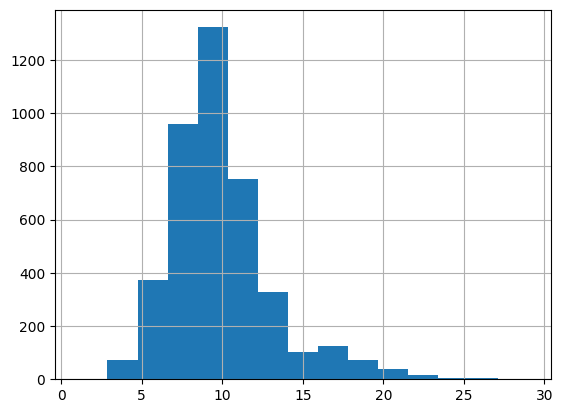

In [11]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

#### <b>Correlation for Rings with the other variables. The closer they are to 1, the more correlation there is. 

In [12]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

### <b>Partitioning features and target

In [15]:
x = abalone.drop("Rings", axis=1)
x = x.values
y = abalone["Rings"]
y = y.values

### <b>Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20204064)

### <b>Fit the Model

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### <b>Evaluate the prediction error(by Root Mean Squared Error) on the training data

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6714487913853517

### <b>Evaluate the prediction error(by RMSE) on the test data

In [28]:
test_preds = knn_model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.3898654087590345

#### Since test data get higher error than train data means The model is overfitted

### <b> See the trend of predicted and actual size using test dataset before performing optimization

#### Using length to x axis and diameter to y axis, predict size by color depth scatter plot using x_test data

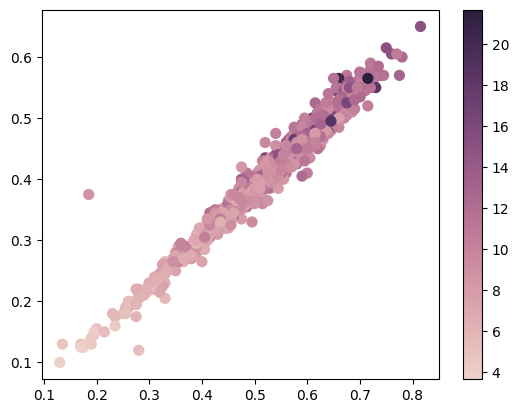

In [31]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

#### See scatter plot trend using Actual y_test data as it like above prediction trend or not

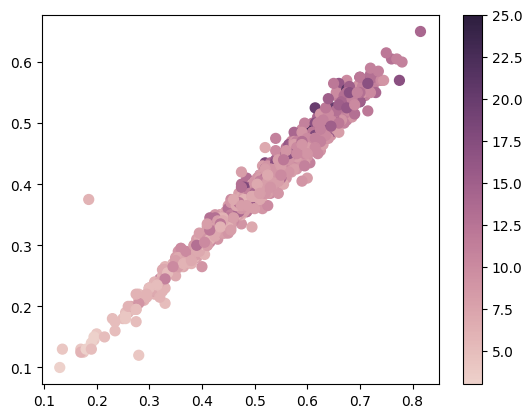

In [32]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


#### This above two diagram confirms that the trend this model is learning does indeed make sense

### <b> Prediction & Hyperparameter Tuning

#### <b> 1. Optimize kNN Using GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 22}

In [70]:
train_preds_grid = gridsearch.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.066604486030608

In [68]:
test_rmse

2.1642922856468503

#### The training error is worse than before which goes to 2.06 from 1.67, but the test error is better than before that comes to 2.16 from 2.38
#### This means that model fits less closely to the training data.
#### Using GridSearchCV to find a value for k has reduced the problem of overfitting on the training data.

#### <b> 2. Adding Weighted Average of Neighbors Based on Distance to reduce the testdata error

In [71]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1583547146171926

#### <b> 3. Further Improving on kNN in scikit-learn With Bagging

In [72]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [73]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [80]:
bagging_model.fit(x_train, y_train)
test_preds_grid = bagging_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1523817337062296

#### <b>Comparison of the Four Models

In three incremental steps, we have pushed the predictive performance of the algorithm. The following points shows a recap of the different models and their performances:
- Model               Error
- Arbitrary k         2.38
- GridSearchCV for k 	2.16
- Average weights 	2.15
- Bagging and GridSearchCV 	2.15

The four models from simplest to most complex. The order of complexity corresponds with the order of the error metrics. The model with a random k performed the worst, and the model with the <b>bagging and GridSearchCV performed the best</b>.